In [2]:
NUM_POINTS_HYPERPARAMS = [10,30,50,100,200]
LSTM_UNITS_HYPERPARAMS = [16,32,64,128,256]

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, LSTM

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
all_data = []
for num_of_points in NUM_POINTS_HYPERPARAMS:
    data = []

    for root, subdirs, files in os.walk('xml_logs'):
        if 'ipynb_checkpoint' in root:
            continue
        
        if len(files) > 0:
            for f in tqdm(files):
                if f.endswith('.xml'):
                    fname = f.split('.')[0]
                    label = fname[:-2]
                    
                    xml_root = ET.parse(f'{root}/{f}').getroot()
                    
                    points = []
                    for element in xml_root.findall('Point'):
                        x = element.get('X')
                        y = element.get('Y')
                        points.append([x, y])
                        
                    points = np.array(points, dtype=float)
                    
                    scaler = StandardScaler()
                    points = scaler.fit_transform(points)
                    
                    resampled = resample(points, NUM_POINTS)
                    
                    data.append((label, resampled))

    all_data.append(data)

  0%|          | 0/161 [00:00<?, ?it/s]

arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
caret
caret
caret
caret
caret
caret
caret
caret
caret
caret
check
check
check
check
check
check
check
check
check
check
circle
circle
circle
circle
circle
circle
circle
circle
circle
circle
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curl

  0%|          | 0/161 [00:00<?, ?it/s]

arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
caret
caret
caret
caret
caret
caret
caret
caret
caret
caret
check
check
check
check
check
check
check
check
check
check
circle
circle
circle
circle
circle
circle
circle
circle
circle
circle
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curl

  0%|          | 0/161 [00:00<?, ?it/s]

arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
caret
caret
caret
caret
caret
caret
caret
caret
caret
caret
check
check
check
check
check
check
check
check
check
check
circle
circle
circle
circle
circle
circle
circle
circle
circle
circle
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curl

  0%|          | 0/161 [00:00<?, ?it/s]

arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
caret
caret
caret
caret
caret
caret
caret
caret
caret
caret
check
check
check
check
check
check
check
check
check
check
circle
circle
circle
circle
circle
circle
circle
circle
circle
circle
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curl

  0%|          | 0/161 [00:00<?, ?it/s]

arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
arrow
caret
caret
caret
caret
caret
caret
caret
caret
caret
caret
check
check
check
check
check
check
check
check
check
check
circle
circle
circle
circle
circle
circle
circle
circle
circle
circle
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-curly-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
left-square-bracket
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
pigtail
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
rectangle
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curly-bracket
right-curl

In [3]:
print(data[0])

('circle', array([[ 0.39614738,  1.23878281],
       [ 0.41640474,  1.24944382],
       [ 0.32574933,  1.23349315],
       [ 0.20528607,  1.19020485],
       [ 0.05895488,  1.14892778],
       [-0.03838591,  1.09789069],
       [-0.13130621,  1.05092674],
       [-0.24395244,  0.99936663],
       [-0.32827437,  0.96927375],
       [-0.46301582,  0.9308409 ],
       [-0.64232442,  0.86851592],
       [-0.85845013,  0.78859315],
       [-1.01814115,  0.68629003],
       [-1.18105995,  0.52518996],
       [-1.3198411 ,  0.33390685],
       [-1.43016759,  0.13976434],
       [-1.48683351, -0.05110504],
       [-1.52967367, -0.23358213],
       [-1.52797628, -0.39706236],
       [-1.53663367, -0.57059745],
       [-1.50573861, -0.72605916],
       [-1.41351033, -0.87615808],
       [-1.2478871 , -1.01459046],
       [-1.09692458, -1.13804789],
       [-0.91808836, -1.23238619],
       [-0.67224916, -1.32632989],
       [-0.42183296, -1.39604729],
       [-0.26244807, -1.44308561],
       [-

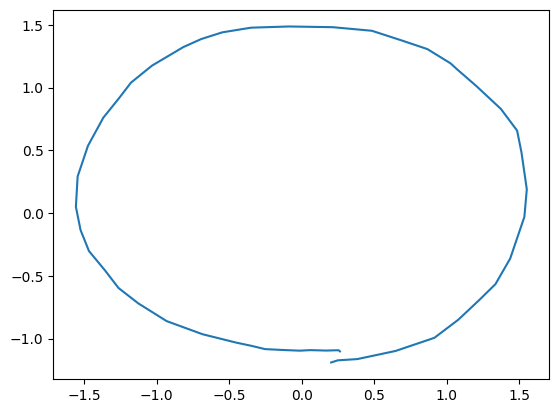

In [4]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

In [5]:
# Prepare the data
labels = [sample[0] for sample in data]

print(set(labels))

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

print(set(labels_encoded))

y = to_categorical(labels_encoded)

print(len(y[0]))

sequences = [sample[1] for sample in data]
X = np.array(sequences)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

{'triangle', 'circle'}
{0, 1}
2
(8, 50, 2) (3, 50, 2) (8, 2) (3, 2)


In [6]:
# Define the model
model = Sequential()

# add LSTM layer
# input shape is (length of an individual sample, dimensions of the sample)
# in our case: two dimensions, as we have X and Y coordinates

# old syntax
#model.add(LSTM(64, input_shape=(NUM_POINTS, 2)))

# new syntax
model.add(Input((NUM_POINTS, 2)))
model.add(LSTM(LSTM_UNITS_HYPERPARAMS))

# add dense layer to do machine learning magic
model.add(Dense(32, activation='relu'))

# here, you can add more layers and maybe a dropout for better performance

# softmax layer for classification
model.add(Dense(len(set(labels)), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [7]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[reduce_lr, stop_early]
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7213 - val_accuracy: 0.6667 - val_loss: 0.6751 - learning_rate: 0.0010
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5000 - loss: 0.7108 - val_accuracy: 0.6667 - val_loss: 0.6844 - learning_rate: 0.0010
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5000 - loss: 0.7025 - val_accuracy: 0.6667 - val_loss: 0.6873 - learning_rate: 0.0010
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.6914 - val_accuracy: 0.6667 - val_loss: 0.6875 - learning_rate: 2.0000e-04


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,896 (226.16 KB)

 Trainable params: 19,298 (75.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,598 (150.78 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


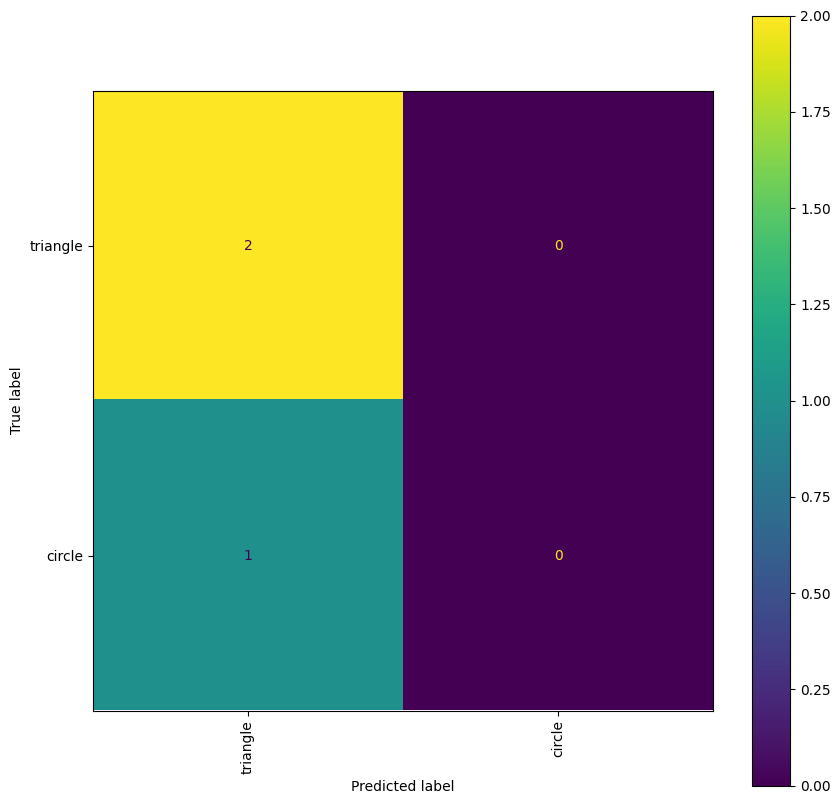

In [9]:
# let the model make predictions for our training data
y_predictions = model.predict(X_test)

# to build a confusion matrix, we have to convert it to classifications
# this can be done by using the argmax() function to set the probability to 1 and the rest to 0
y_predictions = np.argmax(y_predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

# create and plot confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_predictions)

fig = plt.figure(figsize=(10, 10))

ConfusionMatrixDisplay(conf_matrix, display_labels=set(labels)).plot(ax=plt.gca())

plt.xticks(rotation=90, ha='center')
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Label:      triangle
Prediction: circle


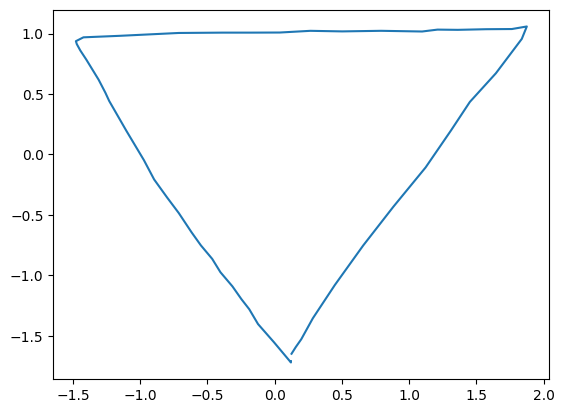

In [16]:
# lets test the model in action

test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

prediction = model.predict(np.array([sequence]))
prediction = np.argmax(prediction)

prediction_label = encoder.inverse_transform(np.array([prediction]))[0]

print('Label:     ', label)
print('Prediction:', prediction_label)